# Sources

- https://lifewithdata.com/2022/03/13/how-to-remove-highly-correlated-features-from-a-dataset/
- https://app.pluralsight.com/player?course=building-regression-models-scikit-learn&author=janani-ravi&name=1616b48f-65fd-4abd-b9fa-7a2560c9d5de&clip=3


# Notation

|General Notation | Description | Python (if applicable) |
|---|---|---|
| $a$ | scalar ||
| $\vec{a}$ | vector ||
| $A$ | matrix ||
| **Regression** | | | |
|  $X$ | training example matrix | `X_train` |   
|  $\vec{y}$  | training example  targets | `y_train` |
|  $\vec{x}^{(i)}$| Features of $ith$ Training Example | `X[i]` |
|  $\vec{x}^{(i)}$, $y^{(i)}$ | $i{th}$ Training Example | `X[i]`, `y[i]`|
| m | number of training examples | `m` |
| n | number of features in each example | `n` |
|  $\vec{w}$  |  parameter: weight, | `w` |
| $b$ | parameter: bias | `b` |     
| $f_{\vec{w},b}(\vec{x}^{(i)})$ | The result of the model evaluation at $\vec{x}^{(i)}$ parameterized by $\vec{w},b$: $f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w} \cdot \vec{x}^{(i)}+b$  | `f_wb` | 

# Dependencies and data import

You are asked to predict a final grade of the math course based on the information we have about the student. The dataset is provided in the accompanying file 'student-mat.csv'. A full description of the data set can be found in the file 'metadata.txt'.

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Read from csv.
mathscores = pd.read_csv('./data/student-mat.csv', sep=';')

# Data exploration

In [261]:
mathscores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Model 1: Multiple variable linear regression

## Data preparation

Seaborn is a library that allows a.o. to generate heatmaps. Before calling the library's methods, the correlation matrix of the dataset is computed. In order to perform dimensionality reduction, we want to exclude the variables from the dataset which represent the same information as the one we try to predict. 

The heatmap hereunder shows a very high correlation between G1, G2 and G3 (respectively 0.8 and 0.9). For the purpose at hand, this means that adding G1 and G2 to the dataset would likely increase the predictive power of our model. However, if we are interested in understanding the socio-economic features having a high impact on students' results, we are better off discarding them.

Another approach would be to do feature engineering and compute an average of G1, G2 and G3 and set that as the target.

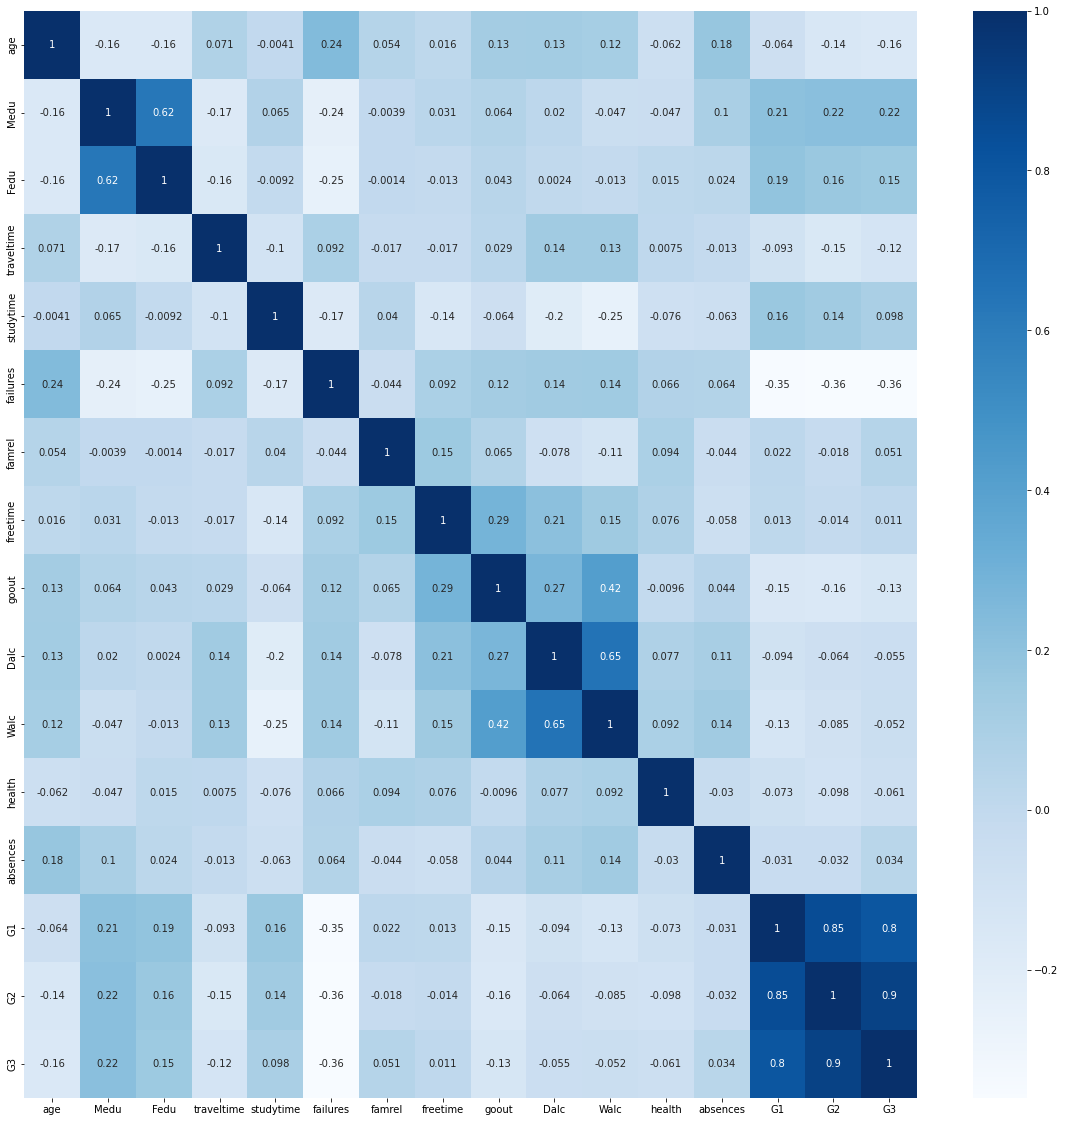

In [262]:
import seaborn as sns

corr_matrix = mathscores.corr()

plt.figure(figsize = (20, 20))
sns.heatmap(corr_matrix, annot = True, cmap="Blues")

# Alternative to heatmap
# print(mathscores.corr()['G3'].sort_values())
mathscores_without_G1_G2_G3 = mathscores.drop(['G1', 'G2', 'G3'], axis = 'columns')

The next step is to pre-process the dataset before feeding it to the machine learning model. Pre-processing means performing scaling or encoding in order to regularize the data. This increases the efficiency of the machine learning step.

We will encode categorical data using one-hot encoding.

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

mathscores_without_G1_G2_G3.info()

# one-hot encoding of categorical features
categorical_features = mathscores_without_G1_G2_G3.select_dtypes(exclude = ['int64'])
numeric_features = mathscores_without_G1_G2_G3.select_dtypes(include = ['int64'])
categorical_features_cols = categorical_features.columns.values.tolist()
numeric_features_cols = numeric_features.columns.values.tolist()
concatenated_cols = categorical_features_cols + numeric_features_cols

enc = OrdinalEncoder(dtype = 'int64')
categorical_features = enc.fit_transform(categorical_features)
concatenated = np.concatenate((categorical_features, numeric_features), axis = 1)

X = pd.DataFrame(concatenated, columns = concatenated_cols)

print(X.info())

#X.to_csv(r'./data/concatenated.csv', index = None, header=True)

y = mathscores['G3']

# 80% - 20% split for the training and testing sets. 316/395 = 0.8 
# Assign train and test sets (in your experiments, you want to do cross-validation).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"X shape: {X_train.shape}, X type:{type(X_train)})")
print(X_train)
print(f"y shape: {y_train.shape}, y type:{type(y_train)})")
print(y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [264]:
# Describe target
print(mathscores['G3'].describe())

count    395.000000
mean      10.415190
std        4.581443
min        0.000000
25%        8.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: G3, dtype: float64


## Create and fit the regression model

In mathematical terms, the model function is expressed as:

$f_{\vec{w},b}(\vec{x}^{(i)}) = \vec{w} . \vec{x} + b$

The values of the $\vec{w}$ vector are called the weights. $b$ is a scalar value, which is called the y-intercept. The goal is to find values for these parameters so that $J(\vec{w}, b)$ - the cost function applied to arguments $\vec{w}$, $b$ - is close to zero, meaning that the values cause the algorithm to fit the training set very well. Gradient descent is an algorithm that aims to achieve this task as efficiently as possible.

The algorithm can be formalized as follows:



$$\text{repeat} \text{ until convergence:} \; \lbrace \newline
\;  w_n = w_n -  \alpha \frac{\partial J(\vec{w},b)}{\partial w_n}  \; \newline

b = b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
$$

where

- $x$ : "input" variable / feature.
- $y$ : "output" / "target" variable.
- $m$ : number of training examples.
- $n$ : number of features
- $w$ : slope. Is calculated by finding the ratio of the "vertical change" to the "horizontal change" between (any) two distinct points on a line.
- $b$ : y-intercept
- $\vec{x}^{(i)}$ : features of ith training example.
- $x_n^{(i)}$ : value of feature j in ith training example.

and

$$\frac{\partial J(\vec{w},b)}{\partial w_n}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})x_n^{(i)} \newline
  \frac{\partial J(\vec{w},b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)})$$

In [265]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

### Parameters

In [266]:
df_w = pd.DataFrame(linear_model.coef_, X.columns, columns=['coef']).sort_values(by='coef', ascending=False)

print(df_w)

b = linear_model.intercept_

print(f"b = {b:0.2f}")

                coef
higher      1.700639
sex         1.300738
internet    0.792493
paid        0.792409
studytime   0.707560
famsize     0.701210
school      0.609279
Medu        0.529818
address     0.329897
freetime    0.294835
famrel      0.247065
reason      0.238589
guardian    0.233552
Fjob        0.075690
absences    0.057863
Walc       -0.006289
Fedu       -0.067077
health     -0.069305
Dalc       -0.164750
Mjob       -0.170237
traveltime -0.233475
age        -0.331318
nursery    -0.342199
goout      -0.403895
activities -0.694812
schoolsup  -0.713398
Pstatus    -0.803206
romantic   -0.952486
famsup     -1.204766
failures   -1.721166
b = 12.01


### Make predictions

In [267]:
print(f"Prediction on training set:\n{linear_model.predict(X_train)[:10]}")
# @ sign computes the dot product of vectors X[i] and w.
print(f"prediction using w,b:\n{(X_train @ w + b)[:10]}")
print(f"Target values:\n{y_train[:10]}")

y_pred = linear_model.predict(X_test)

df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

print(f"y shape: {df_pred_actual.shape}, y type:{type(df_pred_actual)})")
df_pred_actual.info()

df_pred_actual.head(10)


Prediction on training set:
[11.61206314 11.36524507  3.6019868  10.02917797  9.91654649  8.87575422
  9.24364443  8.29482354 13.0917946  11.46185589]
prediction using w,b:
181    11.612063
194    11.365245
173     3.601987
63     10.029178
253     9.916546
225     8.875754
331     9.243644
383     8.294824
227    13.091795
342    11.461856
dtype: float64
Target values:
181    12
194    14
173     0
63      9
253     8
225     7
331    14
383     0
227    12
342    15
Name: G3, dtype: int64
y shape: (79, 2), y type:<class 'pandas.core.frame.DataFrame'>)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 78 to 18
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   predicted  79 non-null     float64
 1   actual     79 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


,predicted,actual
78,3.190641,10
371,7.630642,12
248,8.801663,5
55,11.688471,10
390,8.882127,9
223,10.050852,13
42,11.203186,18
234,13.307075,6
316,9.093462,0
116,11.565973,14


### Metrics

In [268]:
from sklearn.metrics import mean_squared_error, r2_score

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 18.54
Coefficient of determination: 0.10


### Plot predicted vs actuals

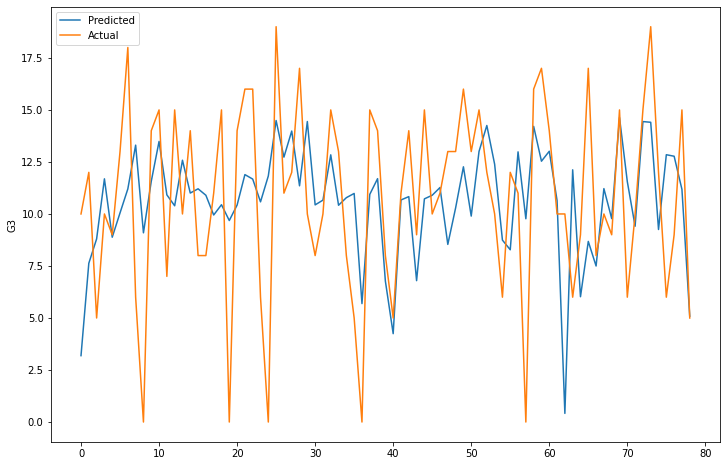

In [269]:
plt.figure(figsize = (12, 8))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('G3')

plt.legend()
plt.show()